## Text

In [100]:
import pandas as pd
import nltk
import wordninja
from spellchecker import SpellChecker
spell = SpellChecker()
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import warnings
warnings.filterwarnings('ignore')

In [101]:
def data_cleaning(df):    
    df = df.reset_index()
    for i in range(len(df)):
        df['Text'][i] = re.sub('https.*', '', df['Text'][i])
        df['Text'][i] = re.sub('@*', '', df['Text'][i])
        df['Text'][i] = re.sub('\n', '', df['Text'][i])
    return df

In [102]:
def data_cleaning_2(df):
    clean_text = []
    for i in df['Text'].tolist():
        try:
            clean_text.append(p.clean(i))
        except:
            clean_text.append("")
    df['full_text_clean'] = clean_text
    return df

In [103]:
def vader(df):
    scores = []
    sid_obj = SentimentIntensityAnalyzer()

    for i in df['full_text_clean'].tolist():
        sentiment_dict = sid_obj.polarity_scores(i)
        scores.append([sentiment_dict['neg']*100, sentiment_dict['neu']*100,sentiment_dict['pos']*100 ])

    sent_dict = {0:'negative', 1:'neutral', 2:'positive'}
    df['neg_sent'] = [i[0] for i in scores]
    df['neu_sent'] = [i[1] for i in scores]
    df['pos_sent'] = [i[2] for i in scores]
    df['sentiment'] = [sent_dict[i.index(max(i))] for i in scores] 
    return df

In [104]:
def text_blob(df):
    tweets = df['full_text_clean']
    import textblob
    import matplotlib.pyplot as plt
    sentiment = []
    sentiment_full = []
    positive = 0
    negative = 0
    neutral = 0
    polarity = 0

    for tweet in tweets:
        myAnalysis=textblob.TextBlob(tweet)
        polarity += myAnalysis.sentiment.polarity
        if myAnalysis.sentiment.polarity ==0:
            neutral+=1
            sentiment.append('neutral')
        elif myAnalysis.sentiment.polarity > 0.00:
            positive+=1
            sentiment.append('positive')

        elif myAnalysis.sentiment.polarity < 0.00:
            negative+=1
            sentiment.append('negative')
            
    df['text_sent'] = sentiment
    return df

In [105]:
def datetimeadd(df):
    df['timestamp'] = pd.to_datetime(df['Datetime'])
    df['new_date_column'] = df['timestamp'].dt.date
    return df

In [106]:
def run_all(df):
    df = data_cleaning(df)
    df = data_cleaning_2(df)
    df = vader(df)
    df = text_blob(df)
    df = datetimeadd(df)
    return df

In [107]:
data = pd.read_csv('bitcoin_tweets_jan_2022.csv')

In [111]:
follower_data = pd.read_csv('followers_data.csv')

df_1_temp = follower_data[follower_data['Follower_count']>100000]
df_1 = set(follower_data[follower_data['Follower_count']>100000]['Username'])

df_2 = set(follower_data[follower_data['verified_flag'] == True]['Username'])

df_3 = set(df_1_temp[df_1_temp['verified_flag'] == True]['Username'])

df_elite = data.sample(25000)
df_1_elite = data[data['Username'].isin(list(df_1))].sample(25000)
df_2_elite = data[data['Username'].isin(list(df_2))].sample(25000)
df_3_elite = data[data['Username'].isin(list(df_3))]

In [112]:
df_final = run_all(df_elite)
df_final_1 = run_all(df_1_elite)
df_final_2 = run_all(df_2_elite)
df_final_3 = run_all(df_3_elite)

In [547]:
df_final_1.columns

Index(['index', 'Datetime', 'Tweet Id', 'Text', 'Username', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'lang', 'retweetedTweet',
       'quotedTweet', 'full_text_clean', 'neg_sent', 'neu_sent', 'pos_sent',
       'sentiment', 'text_sent', 'timestamp', 'new_date_column'],
      dtype='object')

In [548]:
df_final_1[['full_text_clean', 'text_sent']]

,full_text_clean,text_sent
0,These are bad times for bitcoin but when in do...,negative
1,RevMacLive Bitcoin awe thank you so much xoxoxo,positive
2,Phneep OG Bitcoin propaganda artist since Feb ...,negative
3,"Luongo: Bitcoin, 2022, &amp; The Real Story Be...",negative
4,Bitcoin is kept secure by a cryptographic algo...,negative
...,...,...
24995,"Twitter'n kurucusu Jack Dorsey, Bitcoin madenc...",neutral
24996,Bukele podr ser el Presidente de la Repblica y...,neutral
24997,"Bitcoin, Ether, Dogecoin ,",neutral
24998,"Bitcoin, Ether Plummet To 6-Month Lows As Cryp...",neutral


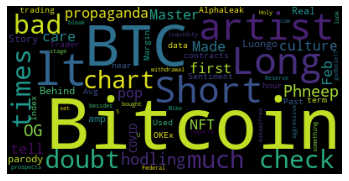

In [557]:
from wordcloud import WordCloud, STOPWORDS

text = df_final_1[df_final_1['text_sent'] == 'negative']['Text'].values 
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

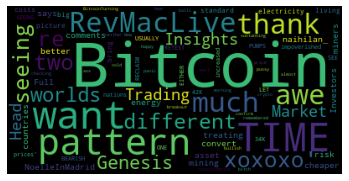

In [558]:
from wordcloud import WordCloud, STOPWORDS

text = df_final_1[df_final_1['text_sent'] == 'positive']['Text'].values 
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

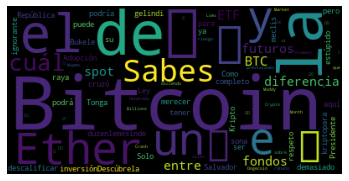

In [559]:
from wordcloud import WordCloud, STOPWORDS

text = df_final_1[df_final_1['text_sent'] == 'neutral']['Text'].values 
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [113]:
c = df_final.groupby(['new_date_column', 'text_sent']).count()[['Text']]
c_0 = c*100 / c.groupby(level=0).sum()

c = df_final_1.groupby(['new_date_column', 'text_sent']).count()[['Text']]
c_1 = c*100 / c.groupby(level=0).sum()
c = df_final_2.groupby(['new_date_column', 'text_sent']).count()[['Text']]
c_2 = c*100 / c.groupby(level=0).sum()
c = df_final_3.groupby(['new_date_column', 'text_sent']).count()[['Text']]
c_3 = c*100 / c.groupby(level=0).sum()


In [114]:
df_zero = pd.pivot(data = c_0.reset_index(), index = 'new_date_column', columns = 'text_sent', values = 'Text').reset_index()
df_zero = pd.merge(df_zero, df_final.groupby(['new_date_column']).count()['Text'], left_on ='new_date_column', right_on ='new_date_column' )


df_one = pd.pivot(data = c_1.reset_index(), index = 'new_date_column', columns = 'text_sent', values = 'Text').reset_index()
df_one = pd.merge(df_one, df_final_1.groupby(['new_date_column']).count()['Text'], left_on ='new_date_column', right_on ='new_date_column' )



df_two = pd.pivot(data = c_2.reset_index(), index = 'new_date_column', columns = 'text_sent', values = 'Text').reset_index()
df_two = pd.merge(df_two, df_final_2.groupby(['new_date_column']).count()['Text'], left_on ='new_date_column', right_on ='new_date_column' )

df_three = pd.pivot(data = c_3.reset_index(), index = 'new_date_column', columns = 'text_sent', values = 'Text').reset_index()
df_three = pd.merge(df_three, df_final_3.groupby(['new_date_column']).count()['Text'], left_on ='new_date_column', right_on ='new_date_column' )


In [119]:
df_zero.to_csv('dfone.csv')

In [120]:
df_one.to_csv('dftwo.csv')

In [121]:
df_two.to_csv('dfthree.csv')

In [122]:
df_three.to_csv('dffour.csv')

In [587]:
dataset = pd.read_csv('latest.csv')

In [588]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [589]:
#X = dataset.drop(['price_high_low_class', 'Bitcoin_target_price','Date'], axis = 1)
X_1 = dataset.drop(['price_high_low_class', 'Bitcoin_target_price','Date'], axis = 1)
y = dataset['price_high_low_class']
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .25, random_state = 1) 


In [590]:
rf_all_features = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf_all_features.fit(X_train, y_train) 

accuracy_score(y_test, rf_all_features.predict(X_test))

0.4318181818181818

In [591]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=10)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	28
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	28
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	28
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	28
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	28
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	28
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	28
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	28
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	29



BorutaPy(estimator=RandomForestClassifier(max_depth=10, n_estimators=14,
                                          random_state=RandomState(MT19937) at 0x7FAC9BBF6D40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FAC9BBF6D40, verbose=2)

In [592]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [16 21 22 19 13  6 23 13 11 20 12  3  6  4 16 10  9 15  8  6  2 18 26 27
 25 29 29 24 27]
No. of significant features:  0


In [611]:
X_1.columns

Index(['tweet_volume', 'likes_greater_than_0', 'likes_greater_than_1',
       'likes_greater_than_10', 'likes_greater_than_100',
       'likes_greater_than_1000', 'distinct_users', 'hour_of_day_0_6',
       'hour_of_day_6_12', 'hour_of_day_12_18', 'hour_of_day_18_24',
       'negative_1l', 'neutral_1l', 'positive_1l',
       'tweets_by_users_with_followers_1l', 'negative_verified',
       'neutral_verified', 'positive_verified',
       'tweets_by_users_with_followers_verified', 'retweet_perc',
       'Btc_current_price', 'day__Friday', 'day__Monday', 'day__Saturday',
       'day__Sunday', 'day__Thursday', 'day__Tuesday', 'day__Wednesday'],
      dtype='object')

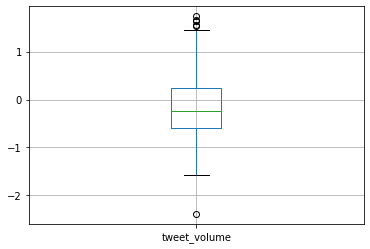

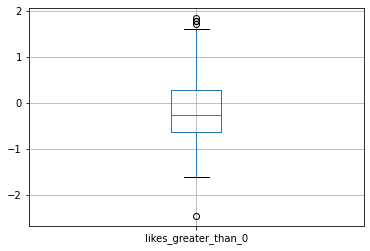

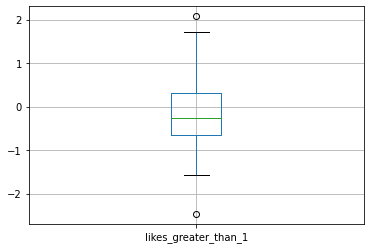

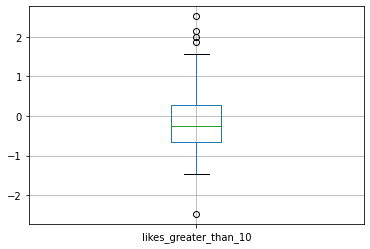

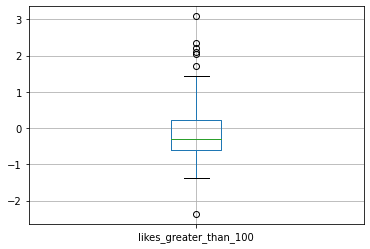

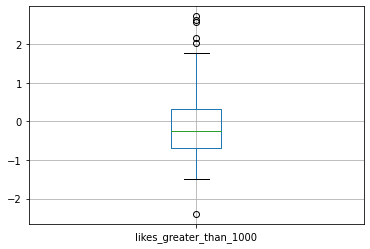

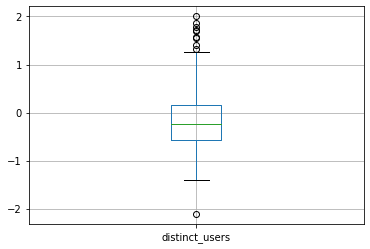

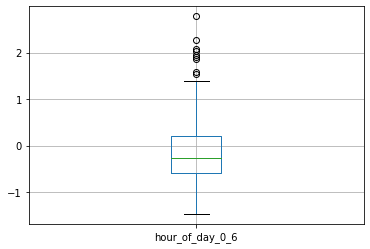

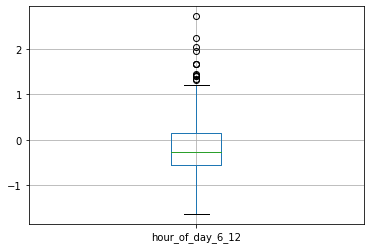

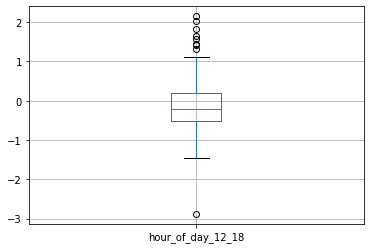

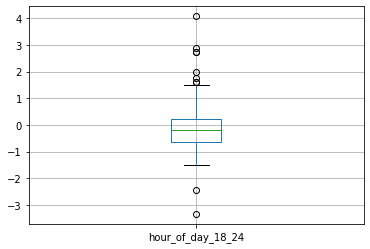

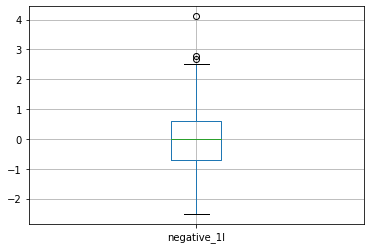

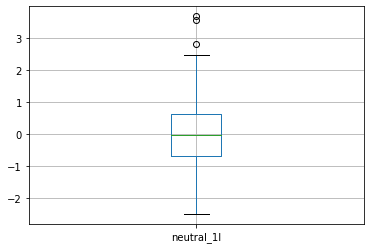

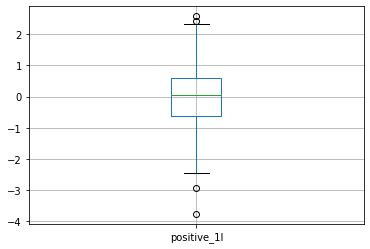

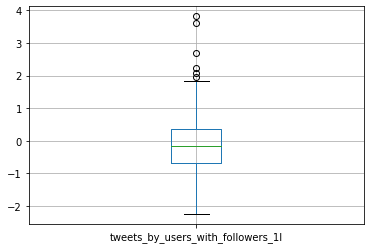

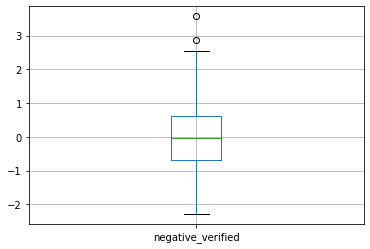

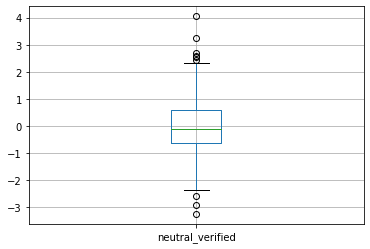

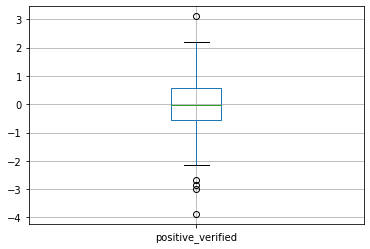

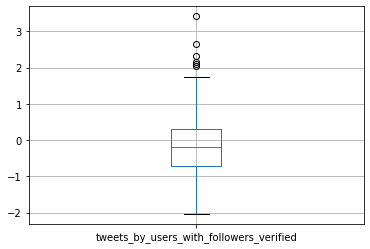

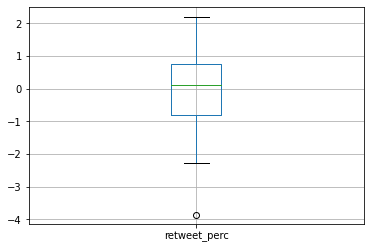

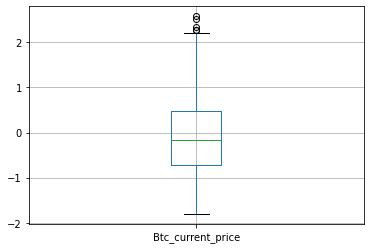

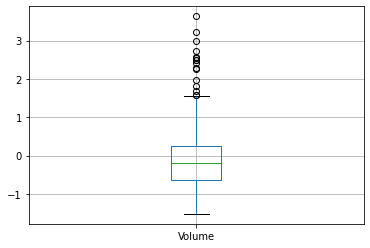

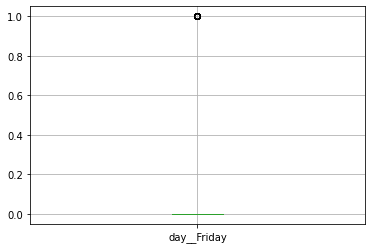

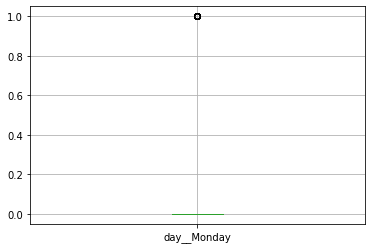

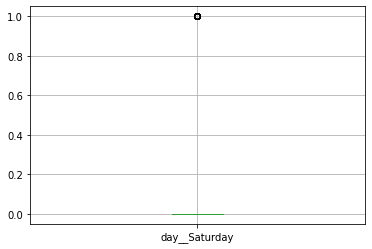

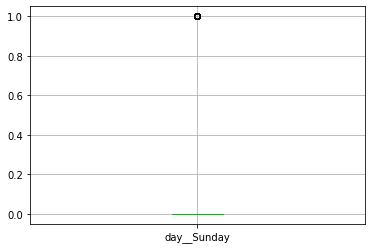

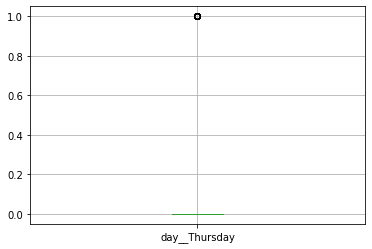

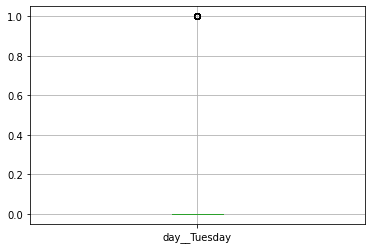

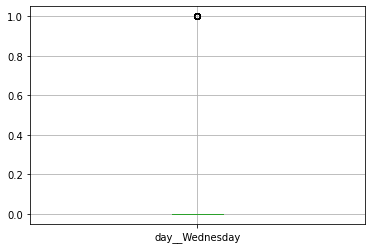

In [603]:
import matplotlib.pyplot as plt

for column in X_1:
    plt.figure()
    X_1.boxplot([column])

In [594]:
dataset_1 = dataset[dataset['tweet_volume']<1.8]
#dataset_2 = dataset_1[dataset_1['Volume']<1.6]
#dataset_3 = dataset[dataset['Btc_current_price']<2.2]

In [375]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [630]:
from sklearn.model_selection import train_test_split
X_1 = dataset_1.drop(['Bitcoin_target_price', 'price_high_low_class', 'Date', 'hour_of_day_6_12', 'hour_of_day_0_6', 'likes_greater_than_1', 'likes_greater_than_10', 'likes_greater_than_100'], axis = 1)
y = dataset_1['price_high_low_class']

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.25, random_state = 0)


In [605]:
X_train = pd.concat([X_train, X_train, X_train])
y_train = pd.concat([y_train, y_train, y_train])

In [578]:
layer1 = [X_1.shape[1]*4, X_1.shape[1]*2, X_1.shape[1]*3,X_1.shape[1]]
layer2 = [X_1.shape[1]*4, X_1.shape[1]*2, X_1.shape[1]*3,X_1.shape[1]]
activation1 = ['elu']
activation2 = [ 'elu']


for layer_1 in layer1:
    for layer_2 in layer2:
        for ac1 in activation1:
            for ac2 in activation2:
          
                model = Sequential()
                model.add(Dense(layer_1, input_dim=X_train.shape[1], activation='elu'))
                model.add(Dense(layer_2, activation=ac1))
                model.add(Dense(1, activation=ac2))

                model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

                model.fit(X_train, y_train, epochs=150, batch_size=5, verbose=0)

                # evaluate the keras model
                _, accuracy = model.evaluate(X_test, y_test)
                print(layer_1, layer_2, ac1, ac2)
                print('Accuracy: %.2f' % (accuracy*100))

3/3 [==============================] - 0s 2ms/step - loss: 1.8939 - accuracy: 0.5114
48 48 elu elu
Accuracy: 51.14
3/3 [==============================] - 0s 2ms/step - loss: 5.9435 - accuracy: 0.3864
48 24 elu elu
Accuracy: 38.64


KeyboardInterrupt: 

In [ ]:
63 63 elu elu


In [631]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[18 26]
 [13 27]]


0.5357142857142857

In [632]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19 25]
 [17 23]]


0.5

In [633]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19 25]
 [15 25]]


0.5238095238095238

In [634]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21 23]
 [17 23]]


0.5238095238095238

In [635]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[24 20]
 [21 19]]


0.5119047619047619